In [117]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures

In [4]:
df = pd.read_csv(r'C:\Users\Yogi\Desktop\Fuel_Consumption_Ratings.csv',encoding='unicode_escape')
df1 = df[['Engine Size','Cylinders','Fuel Consumption','CO2 Emissions']].dropna()
df1.sample(10)

,Engine Size,Cylinders,Fuel Consumption,CO2 Emissions
1044,2.0,4.0,11.8,242
916,2.9,6.0,13.1,273
745,2.0,4.0,9.9,204
59,2.0,4.0,10.2,207
165,2.5,4.0,12.1,253
786,2.0,4.0,11.4,227
628,3.5,6.0,10.3,214
772,1.5,3.0,8.5,175
253,6.2,8.0,17.6,339
796,2.0,4.0,10.8,220


In [5]:
df.columns

Index(['Model', 'Make', 'Model.1', 'Vehicle Class', 'Engine Size', 'Cylinders',
       'Transmission', 'Fuel', 'Fuel Consumption', 'Unnamed: 9',
       ...
       'Unnamed: 211', 'Unnamed: 212', 'Unnamed: 213', 'Unnamed: 214',
       'Unnamed: 215', 'Unnamed: 216', 'Unnamed: 217', 'Unnamed: 218',
       'Unnamed: 219', 'Unnamed: 220'],
      dtype='object', length=221)

In [6]:
df1.describe()

,Cylinders
count,1046.000000
mean,5.595602
std,1.796845
min,3.000000
25%,4.000000
50%,6.000000
75%,6.000000
max,16.000000


In [7]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1046 entries, 1 to 1046
Data columns (total 4 columns):
Engine Size         1046 non-null object
Cylinders           1046 non-null float64
Fuel Consumption    1046 non-null object
CO2 Emissions       1046 non-null object
dtypes: float64(1), object(3)
memory usage: 40.9+ KB


In [8]:
df1 = df1.astype(float)
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1046 entries, 1 to 1046
Data columns (total 4 columns):
Engine Size         1046 non-null float64
Cylinders           1046 non-null float64
Fuel Consumption    1046 non-null float64
CO2 Emissions       1046 non-null float64
dtypes: float64(4)
memory usage: 40.9 KB


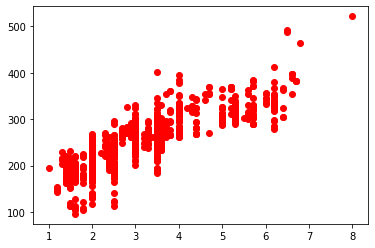

In [9]:
 plt.scatter(df1['Engine Size'],df1['CO2 Emissions'],color='r')
plt.show()

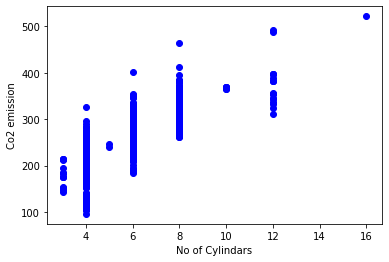

In [10]:
plt.scatter(df1['Cylinders'],df1['CO2 Emissions'],color='b')
plt.xlabel('No of Cylindars')
plt.ylabel('Co2 emission')
plt.show()

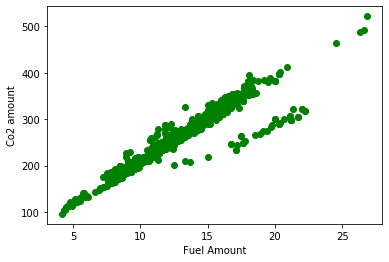

In [11]:
plt.scatter(df1['Fuel Consumption'],df1['CO2 Emissions'],color='g')
plt.xlabel('Fuel Amount')
plt.ylabel('Co2 amount')
plt.show()

In [12]:
msk = np.random.rand(len(df1)) < 0.8
train = df1[msk]
test = df1[~msk]
print(train,test)

      Engine Size  Cylinders  Fuel Consumption  CO2 Emissions
1             2.4        4.0               9.9          199.0
2             3.5        6.0              12.2          252.0
4             3.0        6.0               9.1          210.0
5             3.5        6.0              11.1          261.0
6             2.0        4.0              11.0          232.0
...           ...        ...               ...            ...
1042          2.0        4.0              10.3          211.0
1043          2.0        4.0              11.3          233.0
1044          2.0        4.0              11.8          242.0
1045          2.0        4.0              11.3          233.0
1046          2.0        4.0              12.1          250.0

[833 rows x 4 columns]       Engine Size  Cylinders  Fuel Consumption  CO2 Emissions
3             3.5        6.0              12.2          258.0
10            2.4        4.0              10.2          209.0
12            3.5        6.0              12.0

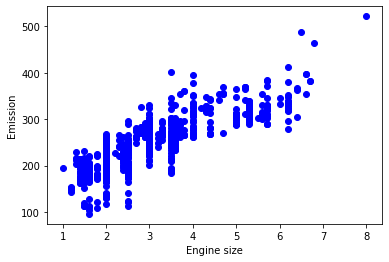

In [13]:
plt.scatter(train['Engine Size'], train['CO2 Emissions'],  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

In [14]:
lregr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['Engine Size']])
train_y = np.asanyarray(train[['CO2 Emissions']])
lregr.fit(train_x,train_y)
print ('Coefficients: ', lregr.coef_)
print ('Intercept: ',lregr.intercept_)

Coefficients:  [[36.89702812]]
Intercept:  [136.37872852]


Text(0, 0.5, 'Emission')

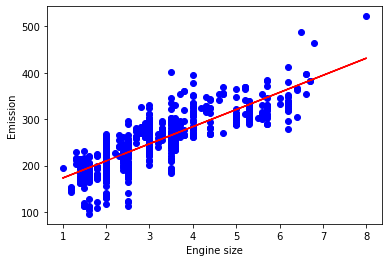

In [15]:
plt.scatter(train['Engine Size'], train['CO2 Emissions'],  color='blue')
plt.plot(train_x, lregr.coef_[0][0]*train_x + lregr.intercept_[0], '-r')
plt.xlabel("Engine size")
plt.ylabel("Emission")

## Linear Regression

In [16]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['Engine Size']])
test_y = np.asanyarray(test[['CO2 Emissions']])
test_y_hat = lregr.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_hat - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_hat - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y_hat , test_y) )

Mean absolute error: 21.56
Residual sum of squares (MSE): 799.99
R2-score: 0.69


In [17]:
lregr1 = linear_model.LinearRegression()
train_x = np.asanyarray(train[['Fuel Consumption']])
train_y = np.asanyarray(train[['CO2 Emissions']])
lregr1.fit(train_x,train_y)
print ('Coefficients: ', lregr1.coef_)
print ('Intercept: ',lregr1.intercept_)

Coefficients:  [[16.22572801]]
Intercept:  [50.43894048]


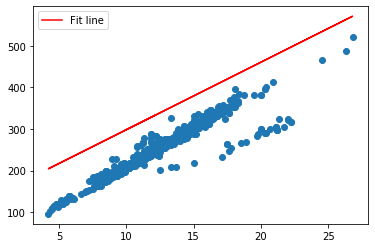

In [33]:
plt.scatter(train['Fuel Consumption'],train['CO2 Emissions'])
plt.plot(train_x,lregr1.coef_[0][0]*train_x+lregr.intercept_[0],'-r',label='Fit line')
plt.legend()

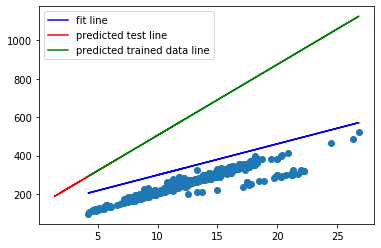

In [40]:
plt.scatter(train['Fuel Consumption'],train['CO2 Emissions'])
plt.plot(train_x,lregr1.coef_[0][0]*train_x+lregr.intercept_[0],'b',label='fit line')
plt.plot(test_x,lregr.predict(test_x),label='predicted test line',c='r')
plt.plot(train_x,lregr.predict(train_x),label='predicted trained data line',c='g')
plt.legend()

In [75]:
mlregr = linear_model.LinearRegression()
mlr_x = np.asanyarray(train[['Fuel Consumption','Cylinders','Engine Size']]) 
mlr_y = np.asanyarray(train['CO2 Emissions'])
mlregr.fit(mlr_x,mlr_y)
print(mlregr.coef_,mlregr.intercept_)
#print(mlregr.coef_.shape)

[13.48153484  3.21210862  4.24616898] 53.37152127484521


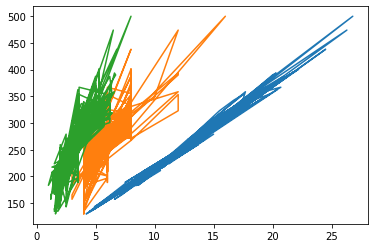

In [58]:
plt.plot(mlr_x,mlregr.predict(traintrain[['Fuel Consumption','Cylinders','Engine Size']]))

In [57]:
mlregr.predict(train[['Fuel Consumption','Cylinders','Engine Size']])

array([209.87795618, 251.98048941, 208.06464693, 237.15080109,
       223.00917691, 227.05363736, 200.75065703, 211.22610966,
       241.19526155, 204.63394782, 204.63394782, 209.52764207,
       216.26840949, 271.00324377, 213.57210252, 275.04770422,
       271.31301901, 322.96069334, 342.53547033, 353.3206982 ,
       267.26855856, 197.39426072, 221.66102342, 218.96471646,
       209.52764207, 218.96471646, 209.52764207, 209.52764207,
       229.63510267, 253.90186538, 240.5351722 , 221.66102342,
       239.18701871, 264.26247635, 266.95878331, 218.96471646,
       237.72402357, 239.07217705, 237.72402357, 256.59817234,
       213.57210252, 213.57210252, 241.82590485, 214.92025601,
       438.23994278, 208.17948859, 202.78687465, 212.22394904,
       212.22394904, 212.22394904, 236.37587009, 257.94632583,
       244.46479099, 239.07217705, 212.22394904, 251.20555841,
       286.49302144, 277.05594705, 286.49302144, 286.49302144,
       278.16862808, 266.03524673, 236.37587009, 257.94

In [81]:
for i in mlregr.coef_:
    print(i)

13.481534837213712
3.2121086156709775
4.246168980573878


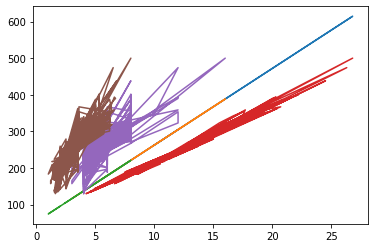

In [93]:
plt.plot(mlr_x,mlr_x*mlregr.coef_[0]+mlr_x*mlregr.coef_[1]+mlr_x*mlregr.coef_[2]+mlregr.intercept_)
plt.plot(mlr_x,mlregr.predict(mlr_x))

In [115]:
test

,Engine Size,Cylinders,Fuel Consumption,CO2 Emissions
3,3.5,6.0,12.2,258.0
10,2.4,4.0,10.2,209.0
12,3.5,6.0,12.0,240.0
19,2.0,4.0,10.8,226.0
23,5.2,12.0,16.4,324.0
...,...,...,...,...
1012,2.0,4.0,9.0,191.0
1015,1.4,4.0,8.2,172.0
1025,1.8,4.0,10.8,218.0
1032,2.0,4.0,11.1,228.0


In [108]:
mlregr.predict([[2,4,10]])

array([135.64471522])

## Polynomial Regression

In [128]:
training_data_set = np.random.rand(len(df1))< 0.8
test_data_set = df1[~training_data_set]
training_data_set= df1[training_data_set]
print(test_data_set,training_data_set)

      Engine Size  Cylinders  Fuel Consumption  CO2 Emissions
1             2.4        4.0               9.9          199.0
4             3.0        6.0               9.1          210.0
11            3.5        6.0              11.4          228.0
12            3.5        6.0              12.0          240.0
14            1.8        4.0               9.7          197.0
...           ...        ...               ...            ...
1023          1.4        4.0               8.2          172.0
1036          2.0        4.0              11.1          219.0
1039          2.0        4.0              10.8          218.0
1040          2.0        4.0              11.1          219.0
1046          2.0        4.0              12.1          250.0

[198 rows x 4 columns]       Engine Size  Cylinders  Fuel Consumption  CO2 Emissions
2             3.5        6.0              12.2          252.0
3             3.5        6.0              12.2          258.0
5             3.5        6.0              11.1

In [138]:
training_data_set_x = training_data_set['Engine Size']
training_data_set_y = training_data_set['CO2 Emissions']
test_data_set_x = test_data_set['Engine Size']
test_data_set_y = test_data_set['CO2 Emissions']
polynomial_to_linear = PolynomialFeatures(degree=2)
polynomial_to_linear_x = polynomial_to_linear.fit_transform([training_data_set_x]) 
